In [99]:
import configparser
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
from math import cos, radians, pi
from trianglesolver import solve, degree
import sys

Disk setup?: QA2



******************Report*******************
Disk setup: QA2
No weights added: VW13 10.8 @ -159.5 deg
Test weight: 0.315 gr
Weight @ 0 deg: VW13 6.9 @ -112.7 deg
Weight @ 90 deg: VW13 6.9 @ 149.7 deg
Offset angle: 39.61601823928281
Weight: 0.43127224544620707



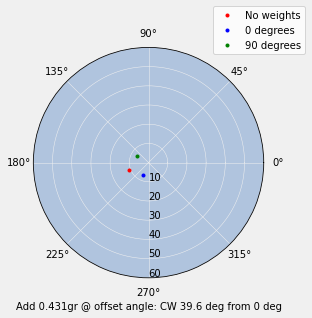

In [101]:
###############################
#name = "QA2"


name = input("Disk setup?:")


Config = configparser.ConfigParser()
Config.read('skf_balancing.cfg')

axis = Config.get(name, 'axis')
weight = float(Config.get(name, 'weight'))
b_mag = float(Config.get(name, 'no_weight_mag'))
b_angle = float(Config.get(name, 'no_weight_ang'))
c_mag = float(Config.get(name, '0_deg_mag'))
c_angle = float(Config.get(name, '0_deg_ang'))
a_mag = float(Config.get(name, '90_deg_mag'))
a_angle = float(Config.get(name, '90_deg_ang'))
total_angle = abs(b_angle-c_angle)

a,b,c,A,B,C = solve(b=b_mag, c=c_mag, A=total_angle*degree)

# radar green, solid grid lines
plt.rc('grid', color='#f0f0f0', linewidth=0.5, linestyle='-')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# force square figure and square axes looks better for polar, IMO
width, height = matplotlib.rcParams['figure.figsize']
size = min(width, height)

# make a square figure
fig = plt.figure(figsize=(size, size))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True) #, facecolor='#b0c4de')

r = np.arange(0, 3.0, 0.01)
ax.set_ylim(0,60)
plt.grid(True)

first = [(b_angle/180.*np.pi), b_mag]
second = [(c_angle/180.*np.pi), c_mag]
third = [(a_angle/180.*np.pi), a_mag]

plt.polar(first[0], first[1], 'k.', color="red", zorder=3, label="No weights")
plt.polar(second[0], second[1], 'k.', color="blue", zorder=3, label="0 degrees")
plt.polar(third[0], third[1], 'k.', color="green", zorder=3, label="90 degrees")

fig.set_facecolor('#f0f0f0')
ax.set_facecolor('#b0c4de')
ax.set_rlabel_position(-90)
ax.legend(loc="upper right", bbox_to_anchor=(1.2,1.2))

balance_weight = ((b_mag/a)*weight)

print("")
print("******************Report*******************")
print("Disk setup: "+name)
print("No weights added: "+axis+" "+str(b_mag)+" @ "+str(b_angle)+" deg")
print("Test weight: "+str(weight)+" gr")
print("Weight @ 0 deg: "+axis+" "+str(c_mag)+" @ "+str(c_angle)+" deg")
print("Weight @ 90 deg: "+axis+" "+str(a_mag)+" @ "+str(a_angle)+" deg")
print("Offset angle: "+str(math.degrees(C)))
print("Weight: "+str(balance_weight))
print("")

#Determine direction
if (a_mag > c_mag):
        dir = "CCW"
else:
	dir = "CW"

#Add text and legend
plt.xlabel("Add "+str(round(balance_weight,3))+"gr @ offset angle: "+dir+' {0:.1f} deg from 0 deg'.format((math.degrees(C))))

plt.show()